In [94]:
import os
import numpy as np
import matplotlib.pyplot as plt
import json
import geojson
import pydiva2d
import netCDF4
import matplotlib._cntr as cntr

In [67]:
resultfile = "/home/ctroupin/ULg/DIVA/BlackSea4diva/results/detrend/MLD01.nc"
outputdir = '/home/ctroupin/Projects/Leaflet/SimpleGeoJSON/'

In [141]:
nc = netCDF4.Dataset(resultfile)
lon = nc.variables['x'][:]
lat = nc.variables['y'][:]
field = nc.variables['analyzed_field'][:]
nc.close()

In [142]:
llon, llat = np.meshgrid(lon, lat)
contours2 = cntr.Cntr(llon, llat, field)

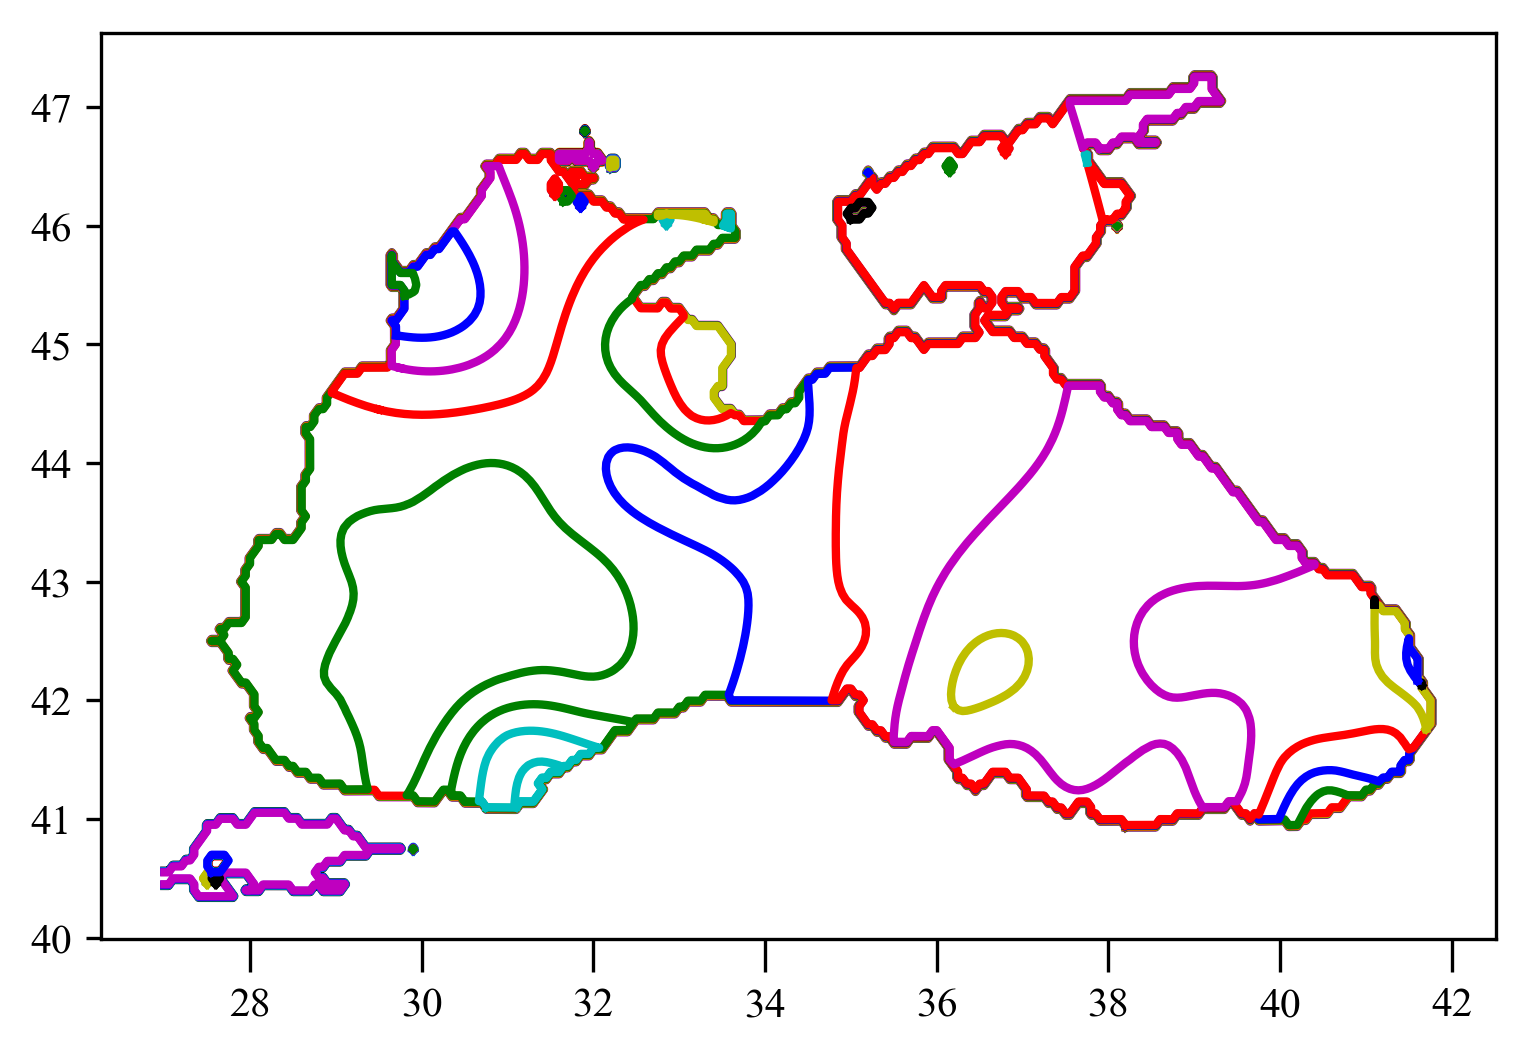

In [143]:
# Loop on levels
levels = np.arange(-60., -10., 5.)
for l in levels:
    aa = contours2.trace(l)
    segments = aa[:len(aa) // 2]
    
    # Loop on segments
    for s in segments:
        xx, yy = [], []
        for _ in s:
            x, y = _
            xx.append(x)
            yy.append(y)
        plt.plot(xx, yy)
plt.show()

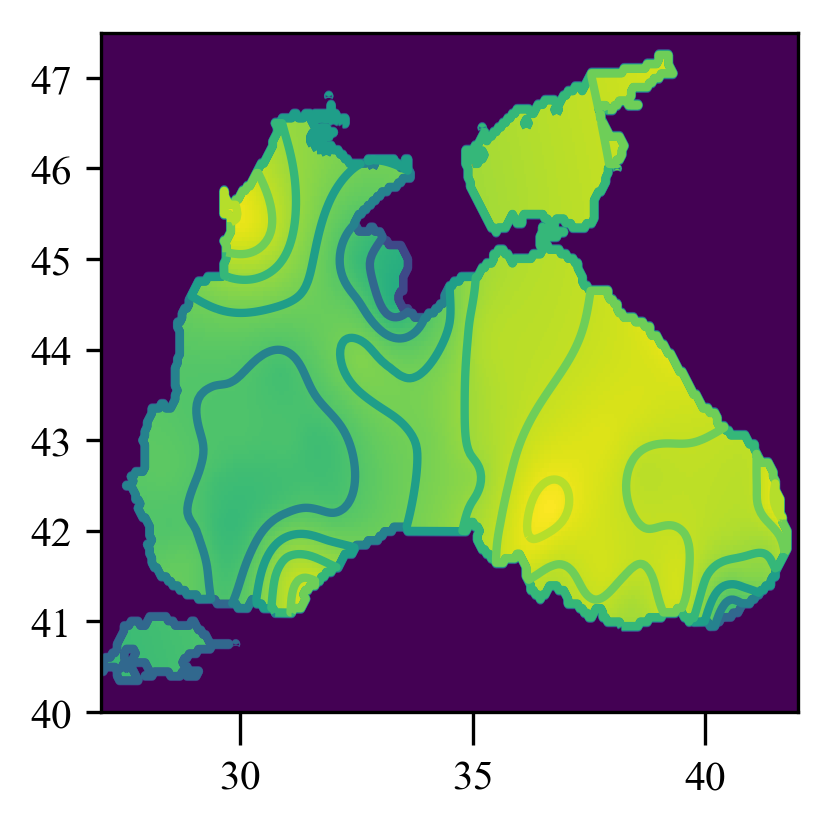

In [144]:
fig = plt.figure(figsize=(3, 3))
cc = plt.contour(lon, lat, field, np.arange(-60, -10, 5))
plt.pcolormesh(lon, lat, field)
plt.show()
plt.close()

In [85]:
contours = cc.allsegs
values = cc.levels
len(contours)

10

In [92]:
contours?

In [86]:
geojson = { 
    "type": "FeatureCollection",
    "features": [
    {
        "type": "Feature",
        "geometry" : {
            "type": "MultiPolygon",
            "coordinates": [[ [ [lon, lat] for lon, lat in cc] for cc in contour]],
            },
        "properties" : {"field": vv},
     } for contour, vv in zip(contours, values)] 
}

In [87]:
with open(os.path.join(outputdir, 'BSresult.js'), 'w') as f:
    json.dump(geojson, f)

In [63]:
len(contours)

8

In [34]:
lon, lat

(31.899999618530273, 46.761125402620685)

In [47]:
values

array([   0.,  100.,  200.,  300.,  400.,  500.,  600.,  700.])

In [89]:
field[field == -99] = np.nan

In [90]:
np.nanmin(field)

-48.983364

In [91]:
np.nanmax(field)

-17.660528

In [ ]:
np